In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem, ttest_ind, linregress, iqr

In [2]:
obesity_data_to_load = "Data/share-of-adults-defined-as-obese.csv"
happiness_data_to_load = "Data/2016.csv"
life_expectancy_to_load = "Data/API_SP.DYN.LE00.IN_DS2_en_csv_v2_10515254.csv"
gdp_to_load = "Data/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10515210.csv"

In [3]:
obesity_data = pd.read_csv(obesity_data_to_load)
happiness_data = pd.read_csv(happiness_data_to_load)
life_expectancy_data = pd.read_csv(life_expectancy_to_load)
gdp_data = pd.read_csv(gdp_to_load)

In [4]:
obesity_data.head()

,Entity,Code,Year,"Indicator:Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%) - Age Group:18+ years - Sex:Both sexes (%)"
0,Afghanistan,AFG,1975,0.5
1,Afghanistan,AFG,1976,0.5
2,Afghanistan,AFG,1977,0.6
3,Afghanistan,AFG,1978,0.6
4,Afghanistan,AFG,1979,0.6


In [5]:
happiness_data.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [6]:
life_expectancy_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662,66.074,66.444,66.787,67.113,67.435,...,75.016,75.158,75.299,75.440,75.582,75.725,75.867,NaN,NaN,NaN
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.292,32.742,33.185,33.624,34.060,34.495,...,61.226,61.666,62.086,62.494,62.895,63.288,63.673,NaN,NaN,NaN
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,33.251,33.573,33.914,34.272,34.645,35.031,...,58.192,59.042,59.770,60.373,60.858,61.241,61.547,NaN,NaN,NaN
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.279,63.298,64.187,64.911,65.461,65.848,...,76.652,77.031,77.389,77.702,77.963,78.174,78.345,NaN,NaN,NaN
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
gdp_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.390503e+09,2.549721e+09,2.534637e+09,2.581564e+09,2.649721e+09,2.691620e+09,2.646927e+09,2.700559e+09,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.585657e+10,1.780429e+10,1.990732e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.904636e+10,1.954398e+10,NaN,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.379950e+10,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,NaN,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.192696e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322825e+10,1.138693e+10,1.188368e+10,1.303854e+10,NaN,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,NaN,NaN


In [8]:
# Cleaning Obesity Data
obesity_data_columns_renamed = obesity_data.rename(columns = {
    "Entity": "Country",
    "Code": "Country_Code", 
    "Indicator:Prevalence of obesity among adults, BMI &GreaterEqual; 30 (age-standardized estimate) (%) - Age Group:18+  years - Sex:Both sexes (%)": "Obesity Percentage"}
                   )

obesity_data_columns_renamed["Year"] = obesity_data_columns_renamed["Year"].apply(str)
obesity_data_columns_renamed.dtypes

obesity_data_2016 = obesity_data_columns_renamed.loc[obesity_data_columns_renamed["Year"] == "2016",:]


obesity_data_country_indexed = obesity_data_2016.set_index("Country")
obesity_data_country_indexed.head()

,Country_Code,Year,Obesity Percentage
Country,,,
Afghanistan,AFG,2016,5.5
Albania,ALB,2016,21.7
Algeria,DZA,2016,27.4
Andorra,AND,2016,25.6
Angola,AGO,2016,8.2


In [9]:
life_expectancy_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', 'Unnamed: 63'],
      dtype='object')

In [10]:
# Cleaning Life Expectancy Data
life_expectancy_data_2016 = pd.DataFrame({"Country Name" : life_expectancy_data["Country Name"],
                                         "Year" : life_expectancy_data["2016"]})
life_expectancy_data_2016.columns = ["Country", "Life_Expectancy"]

life_expectancy_data_2016_clean = life_expectancy_data_2016.dropna(subset = ['Life_Expectancy'])
life_expectancy_cleaned = life_expectancy_data_2016_clean.set_index("Country")
life_expectancy_cleaned.head()

,Life_Expectancy
Country,
Aruba,75.867000
Afghanistan,63.673000
Angola,61.547000
Albania,78.345000
Arab World,71.198456


In [11]:
# Cleaning GDP Data
gdp_data_2016 = pd.DataFrame({"Country Name" : gdp_data["Country Name"],
                            "Year" : gdp_data["2016"]})

gdp_data_2016.columns = ["Country","GDP"]


gdp_data_2016_clean = gdp_data_2016.dropna(subset = ['GDP'])
gdp_data_2016_clean = gdp_data_2016_clean.set_index("Country")
gdp_data_2016_clean.head()

,GDP
Country,
Aruba,2.646927e+09
Afghanistan,1.904636e+10
Angola,1.011239e+11
Albania,1.188368e+10
Andorra,2.877312e+09


In [12]:
happiness_data.count()

Country                          157
Region                           157
Happiness Rank                   157
Happiness Score                  157
Lower Confidence Interval        157
Upper Confidence Interval        157
Economy (GDP per Capita)         157
Family                           157
Health (Life Expectancy)         157
Freedom                          157
Trust (Government Corruption)    157
Generosity                       157
Dystopia Residual                157
dtype: int64

In [13]:
obesity_data_country_indexed.count()

Country_Code          190
Year                  191
Obesity Percentage    191
dtype: int64

In [14]:
# Merge All Data Sets
merged_obesity_happiness_data = pd.merge(happiness_data,obesity_data_country_indexed, how = "inner", on = "Country")
merged_obesity_happiness_life_data = pd.merge(merged_obesity_happiness_data,life_expectancy_cleaned, how = "inner", on= "Country")
merged_all_data = pd.merge(merged_obesity_happiness_life_data, gdp_data_2016_clean, how = "inner", on = "Country" )
merged_all_data.sort_values("GDP")

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Country_Code,Year,Obesity Percentage,Life_Expectancy,GDP
118,Comoros,Sub-Saharan Africa,138,3.956,3.860,4.052,0.27509,0.60323,0.29981,0.15412,0.18437,0.18270,2.25632,COM,2016,7.8,63.701000,1.024262e+09
47,Belize,Latin America and Caribbean,52,5.956,5.710,6.202,0.87616,0.68655,0.45569,0.51231,0.10771,0.23684,3.08039,BLZ,2016,24.1,70.384000,1.806646e+09
74,Bhutan,Southern Asia,84,5.196,5.138,5.254,0.85270,0.90836,0.49759,0.46074,0.16160,0.48546,1.82916,BTN,2016,6.4,70.197000,2.219676e+09
133,Burundi,Sub-Saharan Africa,157,2.905,2.732,3.078,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404,BDI,2016,5.4,57.481000,2.959185e+09
37,Suriname,Latin America and Caribbean,40,6.269,6.073,6.465,1.09686,0.77866,0.50933,0.52234,0.12692,0.16665,3.06852,SUR,2016,26.4,71.405000,3.152174e+09
127,Liberia,Sub-Saharan Africa,150,3.622,3.463,3.781,0.10706,0.50353,0.23165,0.25748,0.04852,0.24063,2.23284,LBR,2016,9.9,62.505000,3.277826e+09
95,Sierra Leone,Sub-Saharan Africa,111,4.635,4.505,4.765,0.36485,0.62800,0.00000,0.30685,0.08196,0.23897,3.01402,SLE,2016,8.7,51.835000,3.556037e+09
77,Montenegro,Central and Eastern Europe,88,5.161,5.055,5.267,1.07838,0.74173,0.63533,0.15111,0.12721,0.17191,2.25531,MNE,2016,23.3,77.116000,4.374131e+09
132,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,TGO,2016,8.4,60.232000,4.457733e+09
111,Mauritania,Sub-Saharan Africa,130,4.201,4.127,4.275,0.61391,0.84142,0.28639,0.12680,0.17955,0.22686,1.92630,MRT,2016,12.7,63.238000,4.739299e+09


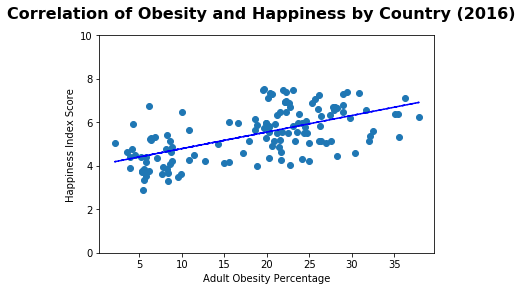

In [15]:
(slope, intercept, _, _, _) = linregress(merged_all_data["Obesity Percentage"],merged_all_data["Happiness Score"])
fit = slope * merged_all_data["Obesity Percentage"] + intercept

fig, ax = plt.subplots()
fig.suptitle("Correlation of Obesity and Happiness by Country (2016)", fontsize=16, fontweight="bold")
ax.set_ylim(0, 10)
ax.set_xlabel("Adult Obesity Percentage")
ax.set_ylabel("Happiness Index Score")
ax.plot(merged_all_data["Obesity Percentage"],merged_all_data["Happiness Score"], linewidth=0, marker='o')
ax.plot(merged_all_data["Obesity Percentage"], fit, 'b--')
plt.show()

In [16]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(merged_all_data["Obesity Percentage"],merged_all_data["Happiness Score"])
print((slope, intercept, rvalue, pvalue, stderr))
if pvalue < 0.05:
    print("The correlation between the Obesity Percentage and Happiness Score is significant.")
else:
    print("The correlation between the Obesity Percentage and Happiness Score is not significant.")
    

(0.07622040264919175, 4.028905634034317, 0.5964572492897343, 2.861917555775755e-14, 0.008927469464254585)
The correlation between the Obesity Percentage and Happiness Score is significant.


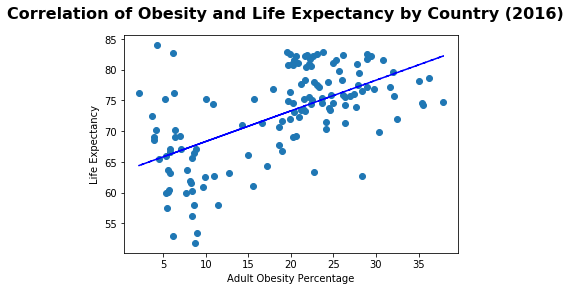

In [17]:
(slope, intercept, _, _, _) = linregress(merged_all_data["Obesity Percentage"],merged_all_data["Life_Expectancy"])
fit = slope * merged_all_data["Obesity Percentage"] + intercept

fig, ax = plt.subplots()
fig.suptitle("Correlation of Obesity and Life Expectancy by Country (2016)", fontsize=16, fontweight="bold")

ax.set_xlabel("Adult Obesity Percentage")
ax.set_ylabel("Life Expectancy")
ax.plot(merged_all_data["Obesity Percentage"],merged_all_data["Life_Expectancy"], linewidth=0, marker='o')
ax.plot(merged_all_data["Obesity Percentage"], fit, 'b--')
plt.show()

In [18]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(merged_all_data["Obesity Percentage"],merged_all_data["Life_Expectancy"])
print((slope, intercept, rvalue, pvalue, stderr))
if pvalue < 0.05:
    print("The correlation between the Obesity Percentage and Life Expectancy is significant.")
else:
    print("The correlation between the Obesity Percentage and Life Expectancy is not significant.")

(0.49778202864910803, 63.364351060378674, 0.5911261055879833, 5.504434019879074e-14, 0.05911791386844236)
The correlation between the Obesity Percentage and Life Expectancy is significant.


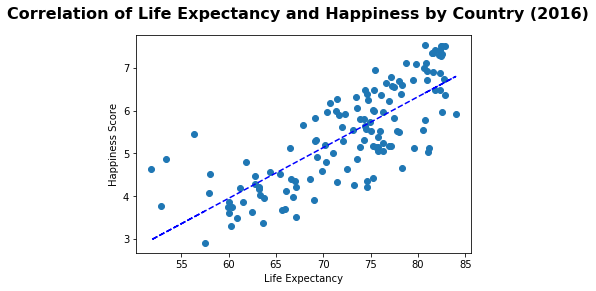

In [19]:
(slope, intercept, _, _, _) = linregress(merged_all_data["Life_Expectancy"],merged_all_data["Happiness Score"])
fit = slope * merged_all_data["Life_Expectancy"] + intercept

fig, ax = plt.subplots()
fig.suptitle("Correlation of Life Expectancy and Happiness by Country (2016)", fontsize=16, fontweight="bold")

ax.set_xlabel("Life Expectancy")
ax.set_ylabel("Happiness Score")
ax.plot(merged_all_data["Life_Expectancy"],merged_all_data["Happiness Score"], linewidth=0, marker='o')
ax.plot(merged_all_data["Life_Expectancy"], fit, 'b--')
plt.show()

In [20]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(merged_all_data["Life_Expectancy"],merged_all_data["Happiness Score"])
print((slope, intercept, rvalue, pvalue, stderr))
if pvalue < 0.05:
    print("The correlation between Life Expectancy and Happiness is significant.")
else:
    print("The correlation between Life Expectancy and Happiness is not significant.")
    

(0.1187520959745095, -3.1777058076940907, 0.7825434132677684, 6.032967065898406e-29, 0.00822341521456088)
The correlation between Life Expectancy and Happiness is significant.


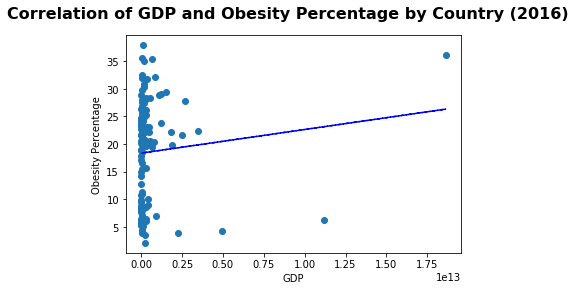

In [21]:
(slope, intercept, _, _, _) = linregress(merged_all_data["GDP"],merged_all_data["Obesity Percentage"])
fit = slope * merged_all_data["GDP"] + intercept

fig, ax = plt.subplots()
fig.suptitle("Correlation of GDP and Obesity Percentage by Country (2016)", fontsize=16, fontweight="bold")
#ax.set_xlim(-55555555555,1000000000000)
ax.set_xlabel("GDP")
ax.set_ylabel("Obesity Percentage")
ax.plot(merged_all_data["GDP"],merged_all_data["Obesity Percentage"], linewidth=0, marker='o')
ax.plot(merged_all_data["GDP"], fit, 'b--')
plt.show()

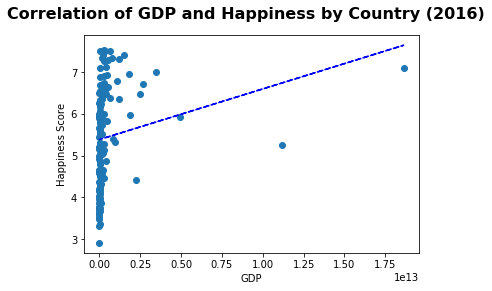

In [22]:
(slope, intercept, _, _, _) = linregress(merged_all_data["GDP"],merged_all_data["Happiness Score"])
fit = slope * merged_all_data["GDP"] + intercept

fig, ax = plt.subplots()
fig.suptitle("Correlation of GDP and Happiness by Country (2016)", fontsize=16, fontweight="bold")
#ax.set_xlim(-55555555555,1000000000000)
ax.set_xlabel("GDP")
ax.set_ylabel("Happiness Score")
ax.plot(merged_all_data["GDP"],merged_all_data["Happiness Score"], linewidth=0, marker='o')
ax.plot(merged_all_data["GDP"], fit, 'b--')
plt.show()

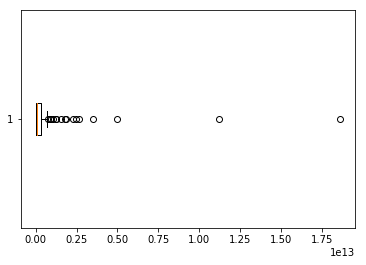

In [23]:
plt.boxplot(merged_all_data["GDP"], vert = False)
plt.show()

276559732325.22565 54125340413.1375


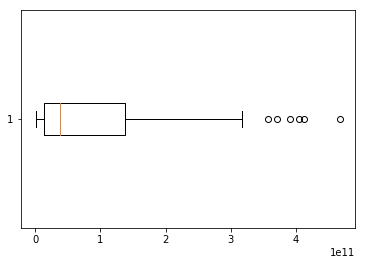

In [24]:

gdp_iqr = iqr(merged_all_data.GDP)
gdp_median = merged_all_data.GDP.median()
print(gdp_iqr, gdp_median)
gdp_lower_limit  = gdp_median - 1.5* gdp_iqr
gdp_upper_limit = gdp_median + 1.5 * gdp_iqr
merged_all_data_without_gdp_outliers  = merged_all_data.loc[(merged_all_data["GDP"] < gdp_upper_limit) & (merged_all_data["GDP"] > gdp_lower_limit)]

plt.boxplot(merged_all_data_without_gdp_outliers["GDP"], vert = False)
plt.show()

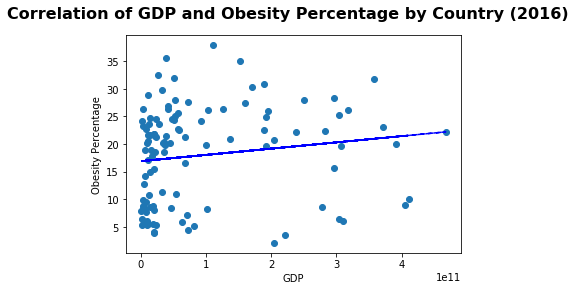

In [25]:
(slope, intercept, _, _, _) = linregress(merged_all_data_without_gdp_outliers["GDP"],merged_all_data_without_gdp_outliers["Obesity Percentage"])
fit = slope * merged_all_data_without_gdp_outliers["GDP"] + intercept

fig, ax = plt.subplots()
fig.suptitle("Correlation of GDP and Obesity Percentage by Country (2016)", fontsize=16, fontweight="bold")
#ax.set_xlim(-55555555555,1000000000000)
ax.set_xlabel("GDP")
ax.set_ylabel("Obesity Percentage")
ax.plot(merged_all_data_without_gdp_outliers["GDP"],merged_all_data_without_gdp_outliers["Obesity Percentage"], linewidth=0, marker='o')
ax.plot(merged_all_data_without_gdp_outliers["GDP"], fit, 'b--')
plt.show()

In [26]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(merged_all_data_without_gdp_outliers["GDP"],merged_all_data_without_gdp_outliers["Obesity Percentage"])
print((slope, intercept, rvalue, pvalue, stderr))
if pvalue < 0.05:
    print("The correlation between GDP and Obesity Percentage is significant.")
else:
    print("The correlation between GDP and Obesity Percentage is not significant.")


(1.134421624938292e-11, 16.904226283548464, 0.14779997992221525, 0.11822685264124955, 7.205141407587885e-12)
The correlation between GDP and Obesity Percentage is not significant.


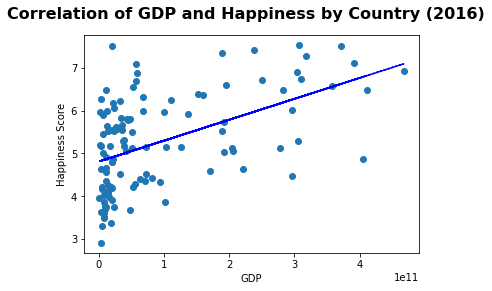

In [27]:
(slope, intercept, _, _, _) = linregress(merged_all_data_without_gdp_outliers["GDP"],merged_all_data_without_gdp_outliers["Happiness Score"])
fit = slope * merged_all_data_without_gdp_outliers["GDP"] + intercept

fig, ax = plt.subplots()
fig.suptitle("Correlation of GDP and Happiness by Country (2016)", fontsize=16, fontweight="bold")
#ax.set_xlim(-55555555555,1000000000000)
ax.set_xlabel("GDP")
ax.set_ylabel("Happiness Score")
ax.plot(merged_all_data_without_gdp_outliers["GDP"],merged_all_data_without_gdp_outliers["Happiness Score"], linewidth=0, marker='o')
ax.plot(merged_all_data_without_gdp_outliers["GDP"], fit, 'b--')
plt.show()

In [28]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(merged_all_data_without_gdp_outliers["GDP"],merged_all_data_without_gdp_outliers["Happiness Score"])
print((slope, intercept, rvalue, pvalue, stderr))
if pvalue < 0.05:
    print("The correlation between GDP and Happiness is significant.")
else:
    print("The correlation between GDP and Happiness is not significant.")


(4.890019208301198e-12, 4.80524048960458, 0.5065267423474329, 1.0400010871207184e-08, 7.900724722335833e-13)
The correlation between GDP and Happiness is significant.
